In [1]:
import pandas as pd
import os
import string
import numpy as np

import tensorflow as tf
import tensorflow_text
import tensorflow_hub as hub

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

In [2]:
tf_model = hub.load(os.getcwd()+ '/../../models/USE_model')

In [3]:
def get_modified_vectors(vec_data):
    
    new_data = []
    for val in vec_data:
        new_data.append(val)
    
    new_data = np.array(new_data).reshape(-1, 512)
    return new_data


###### Query 2: Architekturanalyse ######
###### Max sim: 0.47
###### Min sim: 0.38
###### Mean sim: 0.43

###### Query 3: Big Data, KI für Analyse ######
###### Max sim: 0.27
###### Min sim: 0.17
###### Mean sim: 0.23

###### Query 4: Edge computing ######
###### Max sim: 0.48
###### Min sim: 0.48
###### Mean sim: 0.48

###### Query 5: IT-Standards ######
###### Max sim: 0.46
###### Min sim: 0.46
###### Mean sim: 0.46

###### Query 6: Kommunikationsnetze ######
###### Max sim: 0.48
###### Min sim: 0.44
###### Mean sim: 0.47

###### Query 7: Methode Architektur ######
###### Max sim: 0.4
###### Min sim: 0.27
###### Mean sim: 0.35

###### Query 8: militärische Entscheidungsfindung ######
###### Max sim: 0.45
###### Min sim: 0.45
###### Mean sim: 0.45

###### Query 9: Militärische Kommunikation ######
###### Max sim: 0.51
###### Min sim: 0.36
###### Mean sim: 0.46

###### Query 10: Mixed Reality ######
###### Max sim: 0.46
###### Min sim: 0.37
###### Mean sim: 0.43

###### Query 11: Qua

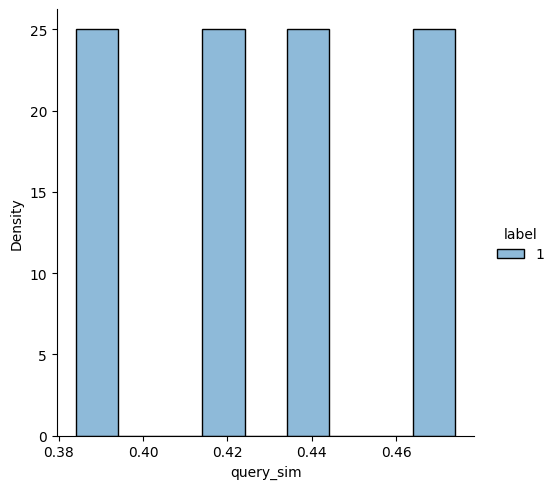

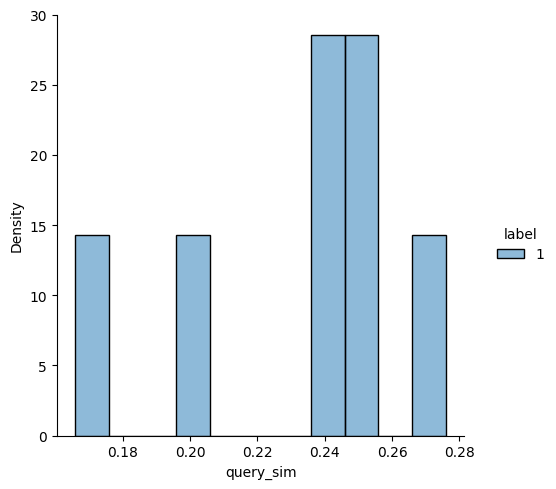

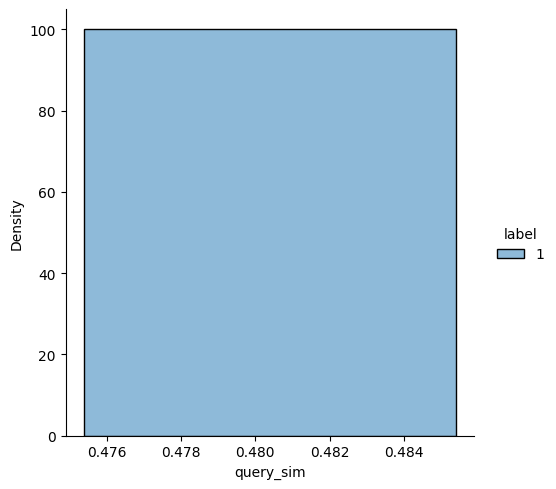

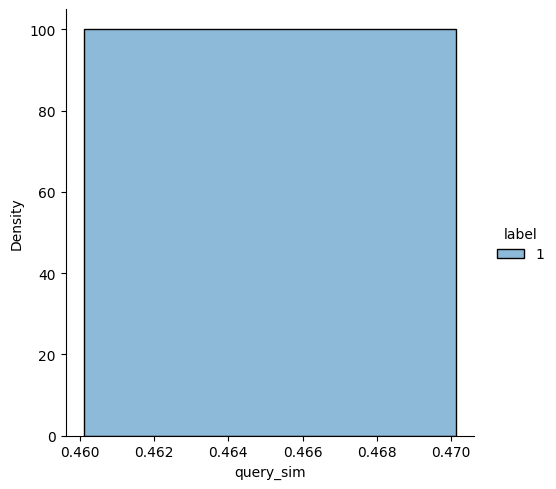

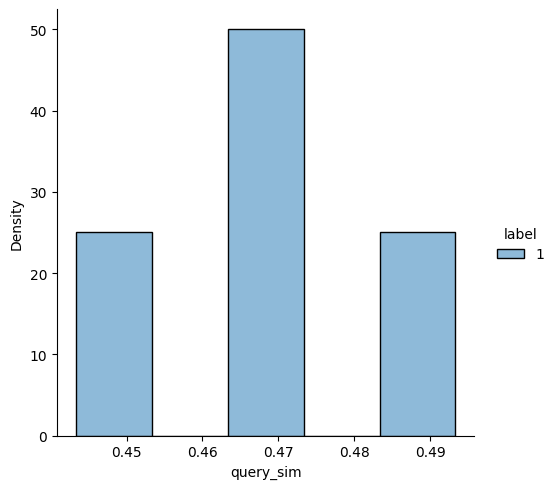

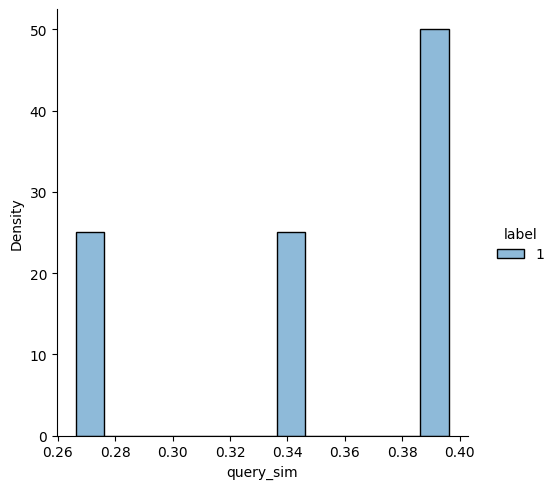

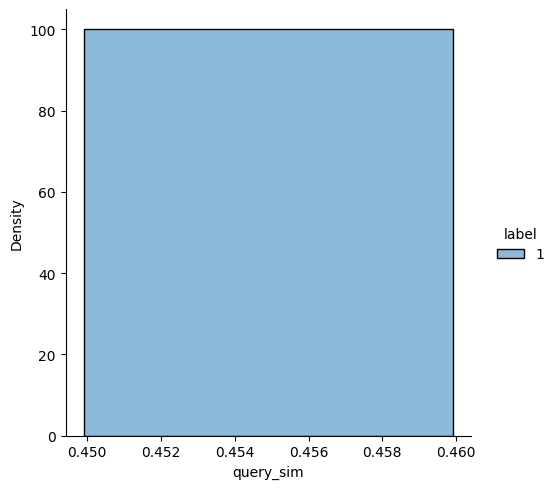

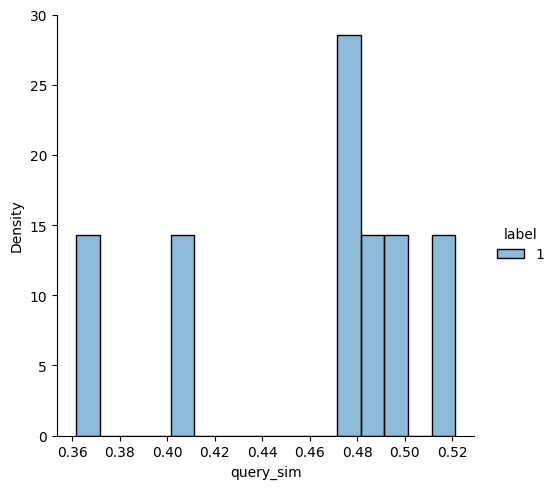

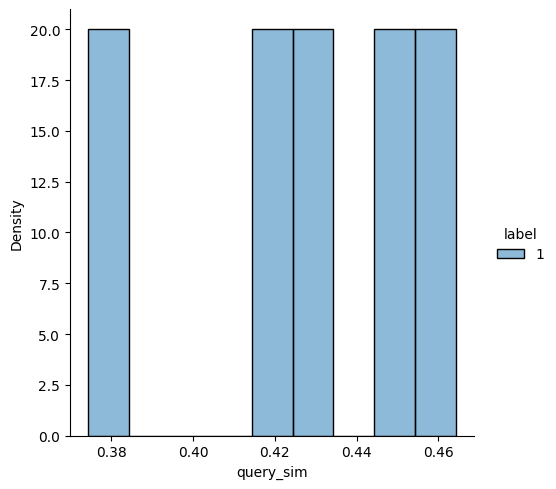

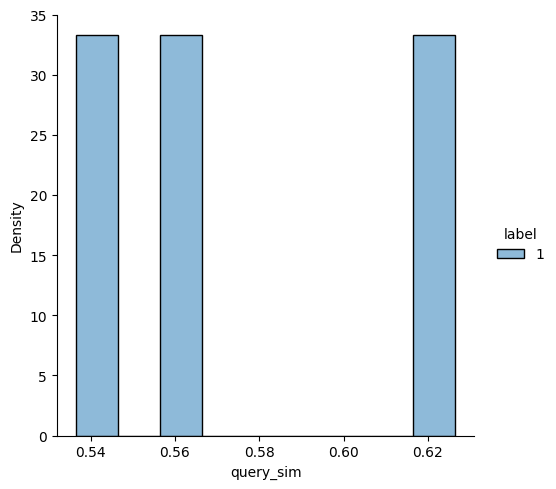

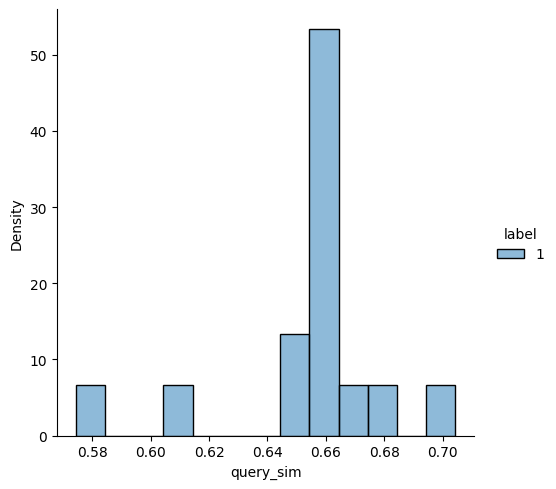

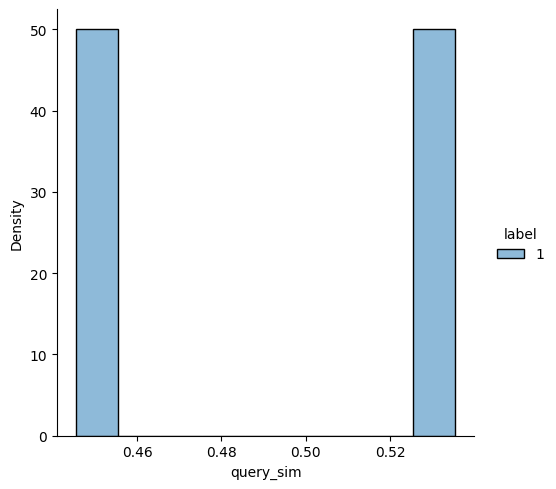

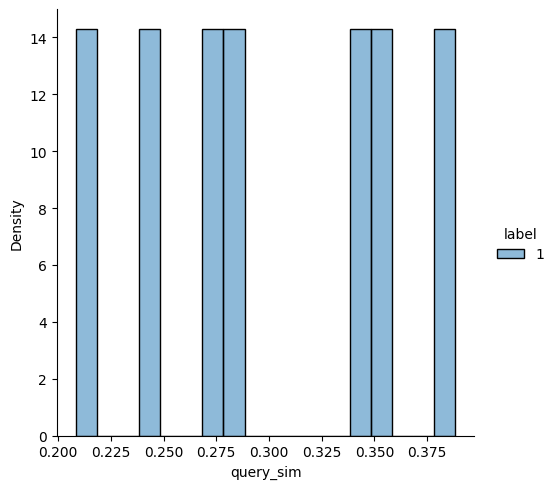

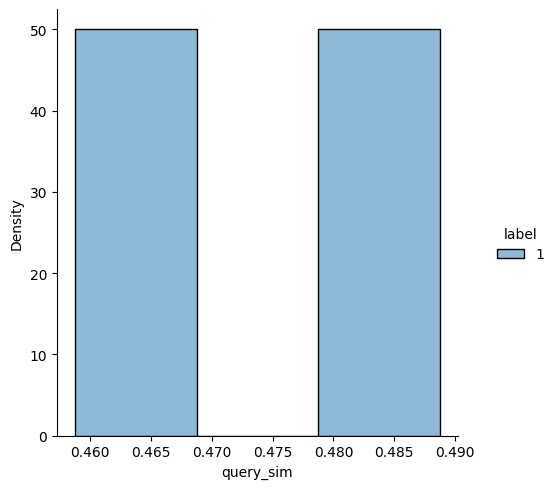

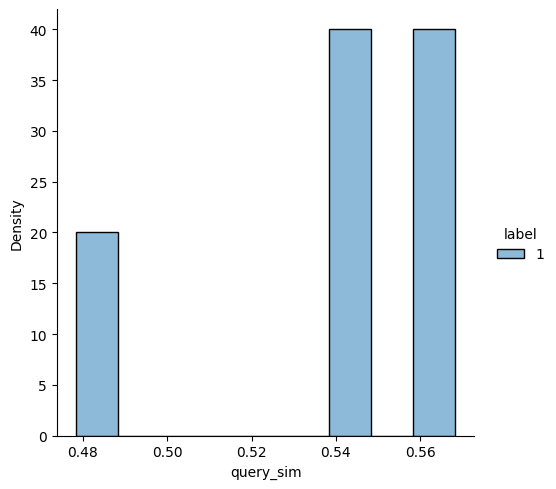

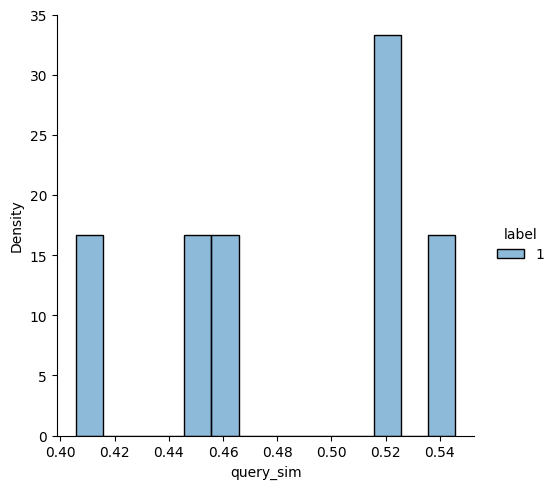

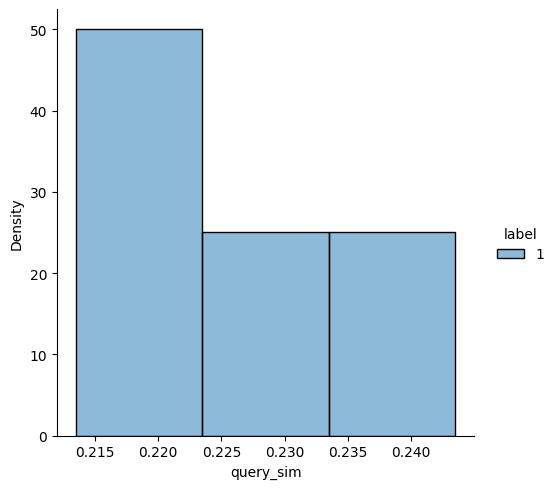

In [4]:
min_sim_list = []
max_sim_list = []
mean_sim_list = []

query_dataframe_folderpath = os.getcwd()+'/../dataframes/query_dataframes/'
idx = 0

for query_df_filename in os.listdir(query_dataframe_folderpath):

    query_df = pd.read_pickle(query_dataframe_folderpath+query_df_filename)
    query = query_df['query'].values[0]

    query_vec = tf_model(query)['outputs'].numpy()[0]
    query_df['query_sim'] = query_df.apply(lambda x:cosine_similarity(get_modified_vectors(query_vec), x['mean_nc_vec'])[0][0], axis=1)

    query_df = query_df.sort_values(by=['query_sim'], ascending=False)
    query_df = query_df.reset_index(drop=True)
    query_df.to_pickle(query_dataframe_folderpath+query_df_filename)
    
    pos_df = query_df[query_df['label'].isin([1])]
    
    if len(pos_df.query_sim) > 0:
        idx += 1
        max_sim = round(max(pos_df.query_sim), 2)
        min_sim = round(min(pos_df.query_sim), 2)
        mean_sim = round(sum(pos_df.query_sim)/len(pos_df.query_sim), 2)

        print(f'\n###### Query {idx+1}: {query} ######')
        print(f'###### Max sim: {max_sim}')
        print(f'###### Min sim: {min_sim}')
        print(f'###### Mean sim: {mean_sim}')

        min_sim_list.append(min_sim)
        max_sim_list.append(max_sim)
        mean_sim_list.append(mean_sim)

        sns.displot(pos_df, x="query_sim", hue="label", binwidth=0.01, stat="density")

In [37]:
min_sim_list

[0.38,
 0.17,
 0.48,
 0.46,
 0.44,
 0.27,
 0.45,
 0.36,
 0.37,
 0.54,
 0.57,
 0.45,
 0.21,
 0.46,
 0.48,
 0.41,
 0.21]

In [35]:
max_mean_sim = round(sum(max_sim_list)/len(max_sim_list), 2)
min_mean_sim = round(sum(min_sim_list)/len(min_sim_list), 2)
mean_mean_sim = round(sum(mean_sim_list)/len(mean_sim_list), 2)

print(f'###### Lowest min sim: {min(min_sim_list)}')
print(f'###### Max mean sim: {max_mean_sim}')
print(f'###### Min mean sim: {min_mean_sim}')
print(f'###### Mean mean sim: {mean_mean_sim}')

###### Lowest min sim: 0.17
###### Max mean sim: 0.47
###### Min mean sim: 0.39
###### Mean mean sim: 0.44
